# IMPORTS

In [42]:
from zipfile import ZipFile
import os
import pandas as pd
from langdetect import detect, DetectorFactory
import numpy as np
import matplotlib.pyplot as plt
import re

# GOODREADS DATASET

## DATA INSTALL

In [40]:
!kaggle datasets download -d dk123891/books-dataset-goodreadsmay-2024

Dataset URL: https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024
License(s): MIT




  0%|          | 0.00/68.9M [00:00<?, ?B/s]
  1%|▏         | 1.00M/68.9M [00:00<01:04, 1.10MB/s]
  3%|▎         | 2.00M/68.9M [00:01<01:03, 1.11MB/s]
  4%|▍         | 3.00M/68.9M [00:02<01:03, 1.09MB/s]
  6%|▌         | 4.00M/68.9M [00:03<00:50, 1.34MB/s]
  7%|▋         | 5.00M/68.9M [00:04<00:52, 1.26MB/s]
  9%|▊         | 6.00M/68.9M [00:06<01:14, 886kB/s] 
 10%|█         | 7.00M/68.9M [00:06<01:04, 1.01MB/s]
 12%|█▏        | 8.00M/68.9M [00:07<01:03, 1.01MB/s]
 13%|█▎        | 9.00M/68.9M [00:10<01:24, 742kB/s] 
 15%|█▍        | 10.0M/68.9M [00:12<01:32, 668kB/s]
 16%|█▌        | 11.0M/68.9M [00:13<01:24, 716kB/s]
 17%|█▋        | 12.0M/68.9M [00:14<01:19, 747kB/s]
 19%|█▉        | 13.0M/68.9M [00:15<01:05, 897kB/s]
 20%|██        | 14.0M/68.9M [00:15<00:56, 1.01MB/s]
 22%|██▏       | 15.0M/68.9M [00:16<00:47, 1.20MB/s]
 23%|██▎       | 16.0M/68.9M [00:17<00:43, 1.27MB/s]
 25%|██▍       | 17.0M/68.9M [00:17<00:38, 1.41MB/s]
 26%|██▌       | 18.0M/68.9M [00:18<00:35, 1.50MB/s]
 28%|

In [44]:
with ZipFile('books-dataset-goodreadsmay-2024.zip') as extractor:
    extractor.extractall()

In [45]:
os.remove('books-dataset-goodreadsmay-2024.zip')

## DATA READ AND ANALYSIS

### READ

In [90]:
data = pd.read_csv('Book_Details.csv')
data.head()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [92]:
data = data[['book_title', 'book_details', 'cover_image_uri', 'author', 'genres']]
data.head()

,book_title,book_details,cover_image_uri,author,genres
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,"['Young Adult', 'Fiction', 'Magic', 'Childrens..."
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."


In [93]:
len(data)

16225

### DROPPING NULLS

In [94]:
data.isnull().sum()

book_title          0
book_details       48
cover_image_uri     0
author              0
genres              0
dtype: int64

In [95]:
data.dropna(inplace=True)

C:\Users\Katie\AppData\Local\Temp\ipykernel_22352\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [96]:
data.isnull().sum()

book_title         0
book_details       0
cover_image_uri    0
author             0
genres             0
dtype: int64

In [97]:
len(data)

16177

### UNIFYING GENRES

In [98]:
data['genres'].value_counts()

genres
[]                                                                                                                   303
['Fiction']                                                                                                           38
['Poetry']                                                                                                            24
['Fantasy']                                                                                                           21
['Mystery', 'Fiction', 'Crime', 'Classics', 'Mystery Thriller', 'Detective', 'Audiobook']                             17
                                                                                                                    ... 
['History', 'Nonfiction', 'Civil War', 'American History', 'Biography', 'African American', 'American Civil War']      1
['Classics', 'Fiction', 'India', 'Historical Fiction', 'Adventure', 'Literature', 'Novels']                            1
['Christian', 'Religion',

In [99]:
for sci in ['sci fi', 'science fiction', 'sci-fi', 'self', 'help', 'self help', 'self-help']:
    print(sci, data['genres'].str.contains(sci, case=False, na=False).sum())

sci fi 1
science fiction 2128
sci-fi 0
self 455
help 455
self help 455
self-help 0


In [100]:
def map_genre(genre):
    genre = genre.lower()
    if re.search(r'adventure|action', genre):
        return 'Adventure'
    if re.search(r'sci[-\s]?fi|science\sfiction', genre):
        return 'Sci Fi'
    elif re.search(r'horror', genre):
        return 'Horror'
    elif re.search(r'fantasy', genre):
        return 'Fantasy'
    elif re.search(r'crime|mystery', genre):
        return 'Crime'
    elif re.search(r'comics', genre):
        return 'Comics'
    elif re.search(r'education', genre):
        return 'Education'
    elif re.search(r'manga', genre):
        return 'Manga'
    elif re.search(r'romance', genre):
        return 'Romance'
    elif re.search(r'self[-\s]?help', genre):
        return 'Self-Help'
    else:
        return 'Other'

In [101]:
data['genres'] = data['genres'].apply(map_genre)

C:\Users\Katie\AppData\Local\Temp\ipykernel_22352\750902993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(map_genre)


In [102]:
data['genres'].value_counts()

genres
Other        5585
Fantasy      2266
Sci Fi       1723
Romance      1681
Crime        1645
Adventure    1628
Horror       1017
Self-Help     416
Comics        132
Education      76
Manga           8
Name: count, dtype: int64

In [103]:
# Drop columns of other genres
data = data[data['genres'] != 'Other']

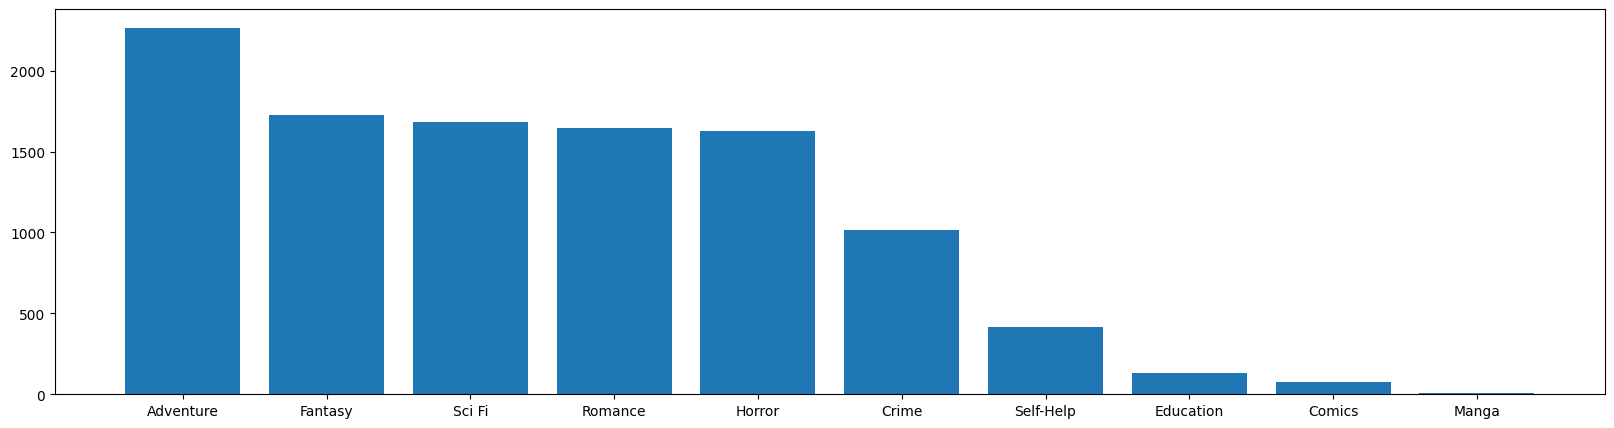

In [104]:
ax, fig = plt.subplots(figsize=(20,5))
fig.bar(data['genres'].unique(), data['genres'].value_counts())
plt.show()

### BALANCING GENRES

In [105]:
category = list(data['genres'].unique())

In [112]:
min_count = 200

balanced_df = pd.DataFrame(columns=data.columns)
for c in category:
    print(f'{c} category is starting...')
    count = 0
    for _,book in data.iterrows():
        if count < min_count:
            if book['genres'] in c:
                #print(book)
                balanced_df = pd.concat([balanced_df, book.to_frame().T])
                count += 1
        else: 
           # print(f'{count} rows of {category} has been added')
            break
    print(f'{count} books of {c} has been added')

Adventure category is starting...
200 books of Adventure has been added
Fantasy category is starting...
200 books of Fantasy has been added
Sci Fi category is starting...
200 books of Sci Fi has been added
Romance category is starting...
200 books of Romance has been added
Horror category is starting...
200 books of Horror has been added
Crime category is starting...
200 books of Crime has been added
Self-Help category is starting...
200 books of Self-Help has been added
Education category is starting...
76 books of Education has been added
Comics category is starting...
132 books of Comics has been added
Manga category is starting...
8 books of Manga has been added


In [65]:
balanced_df['genres'].value_counts()

genres
Adventure    200
Fantasy      200
Sci Fi       200
Romance      200
Horror       200
Crime        200
Self-Help    200
Comics       132
Education     76
Manga          8
Name: count, dtype: int64

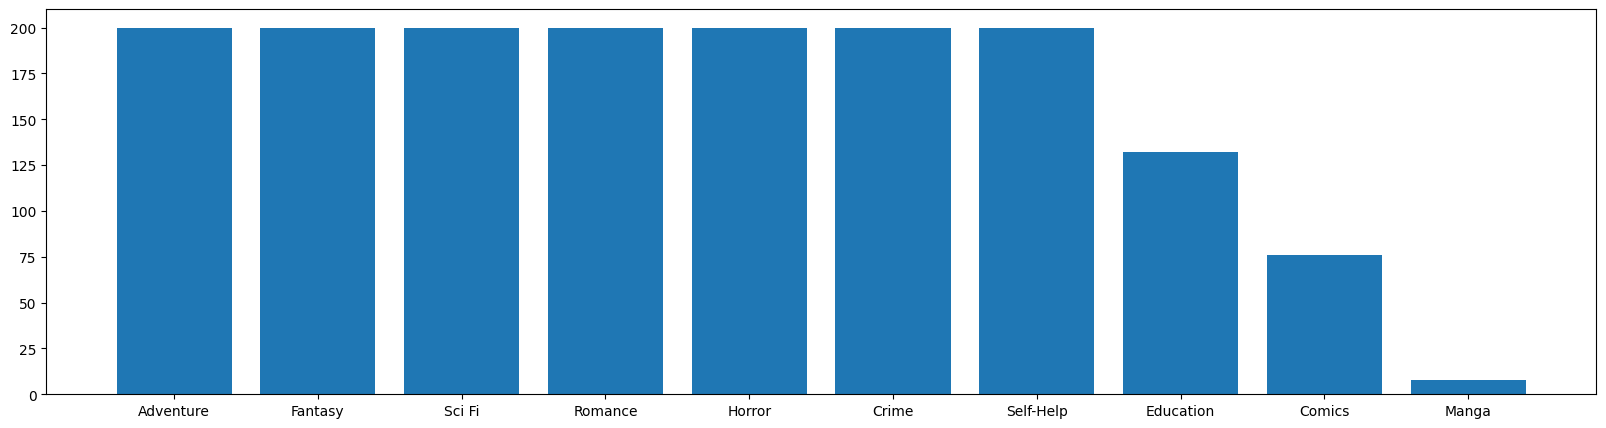

In [107]:
ax, fig = plt.subplots(figsize=(20,5))
fig.bar(balanced_df['genres'].unique(), balanced_df['genres'].value_counts())
plt.show()

### REMOVING NOT ENGLISH BOOKS

In [67]:
DetectorFactory.seed = 0

In [118]:
def is_english(row):
    if row['genres'] != 'Manga':
        try:
            return detect(row['book_title']) == 'en'
        except:
            return False
    else:
        return True

In [120]:
balanced_df = balanced_df[balanced_df.apply(is_english, axis=1)]

In [121]:
balanced_df['genres'].value_counts()

genres
Self-Help    192
Crime        161
Adventure    157
Fantasy      157
Sci Fi       153
Romance      145
Horror       137
Comics        93
Education     74
Manga          8
Name: count, dtype: int64

### FIXING AUTHORS FORMAT

In [122]:
def format_authors(authors):

    authors_list = [author.strip() for author in authors.split(',')]
    formatted_authors = ', '.join(authors_list)
    if len(authors_list) > 2:
        formatted_authors = ', '.join(authors_list[:2]) + ', et al.'
    
    return formatted_authors

In [123]:
balanced_df['author'] = balanced_df['author'].apply(format_authors)

C:\Users\Katie\AppData\Local\Temp\ipykernel_22352\2855808576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['author'] = balanced_df['author'].apply(format_authors)


In [124]:
balanced_df.head()

,book_title,book_details,cover_image_uri,author,genres
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,Adventure
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,Adventure
5,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,Adventure
6,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...",https://images-na.ssl-images-amazon.com/images...,J.K. Rowling,Adventure
16,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"This four-volume, boxed set contains J.R.R. To...",https://images-na.ssl-images-amazon.com/images...,J.R.R. Tolkien,Adventure


### ADDING QTY AND PRICE COLUMNS

In [130]:
balanced_df.rename(columns={'cover_image_uri': 'image', 'book_title': 'name', 'book_details': 'description',  'genres':'category'}, inplace=True)
balanced_df.head()

C:\Users\Katie\AppData\Local\Temp\ipykernel_22352\3697094916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df.rename(columns={'cover_image_uri': 'image', 'book_title': 'name', 'book_details': 'description',  'genres':'category'}, inplace=True)


,name,description,image,price,author,qty,category
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",https://images-na.ssl-images-amazon.com/images...,365.0,J.K. Rowling,45,Adventure
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,https://images-na.ssl-images-amazon.com/images...,842.0,J.K. Rowling,31,Adventure
5,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,https://images-na.ssl-images-amazon.com/images...,661.0,J.K. Rowling,78,Adventure
6,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...",https://images-na.ssl-images-amazon.com/images...,550.0,J.K. Rowling,79,Adventure
16,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"This four-volume, boxed set contains J.R.R. To...",https://images-na.ssl-images-amazon.com/images...,184.0,J.R.R. Tolkien,53,Adventure


In [126]:
import numpy as np
np.random.seed(42)
price = np.random.uniform(low=55.4, high=882.3, size=(len(balanced_df),))
price = [round(p,0) for p in price]
price[:5]

[365.0, 842.0, 661.0, 550.0, 184.0]

In [127]:
qty = list(np.random.randint(low=0, high=100, size=len(balanced_df), dtype=int))
qty[:5]

[45, 31, 78, 79, 53]

In [128]:
balanced_df.insert(3, 'price', price)
balanced_df.insert(5, 'qty', qty)
balanced_df.head()

,name,book_details,image,price,author,qty,category
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",https://images-na.ssl-images-amazon.com/images...,365.0,J.K. Rowling,45,Adventure
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,https://images-na.ssl-images-amazon.com/images...,842.0,J.K. Rowling,31,Adventure
5,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,https://images-na.ssl-images-amazon.com/images...,661.0,J.K. Rowling,78,Adventure
6,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...",https://images-na.ssl-images-amazon.com/images...,550.0,J.K. Rowling,79,Adventure
16,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"This four-volume, boxed set contains J.R.R. To...",https://images-na.ssl-images-amazon.com/images...,184.0,J.R.R. Tolkien,53,Adventure


## EXPORT  DATA

In [131]:
import json
with open('output.txt', 'w') as file:
    json.dump(balanced_df.to_dict('records'), file, indent=4)
